### Homework 2.1.1 - 1D Wave

Solve the wave equation

$$\frac{{{\partial ^2}u}}{{\partial {t^2}}} = c^2 \frac{{{\partial ^2}u}}{{\partial {x^2}}}$$

subjected to the **feeding wave boundary condition** at $x = 0$,

$$u(0, t) = 2\sin(\omega t)$$

and the boundary condition on the other end, $x = L$ is an **open boundary condition**.

where $L = 1$ and the initial condition at $t=0$ is:

$$u(x, 0) = 0$$

You choose appropreate values of **the speed ($c$)** and **the frequency ($\omega$)** to make a nice time-animated graph video clip.

Middle part of the wave: $${u_{i,j + 1}} = \frac{{{\delta ^2}{c^2}}}{{{h^2}}}\left( {{u_{i + 1,j}} + {u_{i - 1,j}}} \right) + 2\left( {1 - \frac{{{\delta ^2}{c^2}}}{{{h^2}}}} \right){u_{i,j}} - {u_{i,j - 1}}$$ Wave at $t=0$
$$ {u_{i,1}} = \frac{{{\delta ^2}{c^2}}}{{2{h^2}}}\left( {{u_{i + 1,0}} + {u_{i - 1,0}}} \right) + \left( {1 - \frac{{{\delta ^2}{c^2}}}{{{h^2}}}} \right){u_{i,0}} $$ Open boundary condition
$$\begin{align}
\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} &= 0,\quad x=L
\end{align}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math

In [3]:
nx = 100
nt = 1000
L=1
D=10
dh = (L-0) / nx
dt = D /nt

t=np.linspace(0,D,nt)
x=np.linspace(0,L,nx)
c = 1
omega = 20

dch2=dt*dt*c*c/dh**2

u = np.zeros((nx,nt))

u[0][1]= 2*np.sin(omega*1*dt) #feeding wave boundary condition at time 1
 
for j in range(1,nt-1):
    u[0][j+1]= 2*np.sin(omega*(j+1)*dt) #feeding wave boundary condition at time j+1
    u[-1][j+1]= u[-1][j] - c*dt/dh*(u[-1][j] - u[-2][j]) #open boundary equation
    for i in range(1,nx-1):
        u[i][j+1]=dch2*(u[i+1,j]+u[i-1,j])+2*(1-dch2)*u[i,j] - u[i,j-1] #the rest

<function matplotlib.pyplot.show(close=None, block=None)>

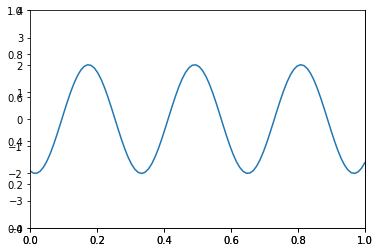

In [4]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, 1), ylim=(-4, 4))
line, = ax.plot(x,u[:,0])


def animate(i):
    line.set_data(x,u[:,i])
    return line

anim = animation.FuncAnimation(fig, animate, frames=1000, repeat=False)
anim.save('wave.mp4', fps = 100)
plt.show

___
### Homework 2.1.2 - 1D Wave with damping

Solve the wave equation

$$\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2} - k \frac{\partial u}{\partial t}$$

subjected to the **feeding wave boundary condition** at $x = 0$,

$$u(0, t) = 2\sin(\omega t)$$

and the boundary condition on the other end, $x = L$ is an **open boundary condition**.

where $L = 1$ and the initial condition at $t=0$ is:

$$u(x, 0) = 0$$

You choose appropreate values of **the speed ($c$)**, **the frequency ($\omega$)**, and **the damping factor ($k$)** to make a nice time-animated graph video clip.

From $$\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2} - k \frac{\partial u}{\partial t}$$ we have the finite differential approximation:

$$\frac{u_{i,j+1}+2u_{i,j}+u_{i,j-1}}{\delta^2} = c^2 \frac{u_{i+1,j}+2u_{i,j}+u_{i-1,j}}{h^2} - k\frac{u_{i,j+1}-u_{i,j-1}}{2\delta}$$ Then we solve for $u_{i,j+1}$;
\begin{align}
{2\delta}{h^2}{(u_{i,j+1}+2u_{i,j}+u_{i,j-1})} &= 2c^2 {\delta^3}{(u_{i+1,j}+2u_{i,j}+u_{i-1,j})} - k{h^2}{\delta^2}{(u_{i,j+1}-u_{i,j-1})}\\
{2}{h^2}{(u_{i,j+1}+2u_{i,j}+u_{i,j-1})} &= 2c^2 {\delta^2}{(u_{i+1,j}+2u_{i,j}+u_{i-1,j})} - k{h^2}{\delta}{(u_{i,j+1}-u_{i,j-1})}\\
{2}{h^2}{(u_{i,j+1}+2u_{i,j}+u_{i,j-1})} +k{h^2}{\delta}{u_{i,j+1}}&= 2c^2 {\delta^2}{(u_{i+1,j}+2u_{i,j}+u_{i-1,j})} +k{h^2}{\delta}{(u_{i,j-1})}\\
{{2}{h^2}u_{i,j+1}+{4}{h^2}u_{i,j}+{2}{h^2}u_{i,j-1}} +k{h^2}{\delta}{u_{i,j+1}}&= 2c^2 {\delta^2}{(u_{i+1,j}+2u_{i,j}+u_{i-1,j})} +k{h^2}{\delta}{(u_{i,j-1})}\\
({{2}{h^2}+k{h^2}{\delta})(u_{i,j+1})+{4}{h^2}u_{i,j}+{2}{h^2}u_{i,j-1}} &= 2c^2 {\delta^2}{(u_{i+1,j}+2u_{i,j}+u_{i-1,j})} +k{h^2}{\delta}{(u_{i,j-1})}\\
({{2}+k{\delta})(u_{i,j+1}) +{4}u_{i,j}+{2}u_{i,j-1}} &= \frac{2c^2{\delta^2}}{h^2} {(u_{i+1,j}+2u_{i,j}+u_{i-1,j})} +k{\delta}{(u_{i,j-1})}\\
({2}+k{\delta})(u_{i,j+1}) +{4}u_{i,j} &= \frac{2c^2{\delta^2}}{h^2} {(u_{i+1,j}+2u_{i,j}+u_{i-1,j})} +(k{\delta}-2){(u_{i,j-1})}
\end{align} Ultimately, $$({2}+k{\delta})(u_{i,j+1}) = \frac{2c^2{\delta^2}}{h^2} {(u_{i+1,j}+2u_{i,j}+u_{i-1,j})} +(k{\delta}-2){(u_{i,j-1})}- {4}u_{i,j} $$

In [5]:
nx = 100
nt = 1000
L=1
D=10
dh = (L-0) / nx
dt = D /nt
k = 2
t=np.linspace(0,D,nt)
x=np.linspace(0,L,nx)
c = 1
omega = 20

dch2=dt*dt*c*c/dh**2
denom= 2+k*dt
coef=2*c*c*dt*dt/dh/dh
coef2=k*dt-2

u = np.zeros((nx,nt))

u[0][1]= 2*np.sin(omega*1*dt)

for j in range(1,nt-1):
    u[0][j+1]= 2*np.sin(omega*(j+1)*dt)
    u[-1][j+1]= u[-1][j] - c*dt/dh*(u[-1][j] - u[-2][j]) 
    for i in range(1,nx-1):
        u[i][j+1]=( coef* (u[i+1][j]+2*u[i][j]+u[i-1][j]) +coef2*u[i][j-1] - 4*u[i][j] ) /denom

In [ ]:
fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, 1), ylim=(-4, 4))
line, = ax.plot(x,u[:,0])


def animate(i):
    line.set_data(x,u[:,i])
    return line

anim = animation.FuncAnimation(fig, animate, frames=1000, repeat=False)
anim.save('wavewithdamp.mp4', fps = 100)
plt.show